# Time Augmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.plotting.backend = "plotly"

from datetime import datetime, timedelta
from pathlib import Path

In [2]:
from tsa_aug import *

def draw_plot(xs, ys=None, figsize=None, title=None, overwrite=False):
    if ys is None:
        if figsize is None:
            figsize=(8,2)
        plt.figure(figsize=figsize);
        if type(xs) is pd.DataFrame:
            xs = xs.values
        plt.plot(xs);
        plt.title(title)
    else:
        figsize=(8,4)
        if type(xs) is pd.DataFrame:
            xs = xs.values
        if type(ys) is pd.DataFrame:
            ys = ys.values
        if overwrite:
            figsize=(8, 2)
            fig, ax1 = plt.subplots(1,1, sharex=True, figsize=figsize)
            ax1.plot(xs)
            ax1.plot(ys, linestyle="dotted")
            fig.suptitle(title)
        else:     
            fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=figsize)
            ax1.plot(xs)
            ax2.plot(ys)
            fig.suptitle(title)

In [3]:
N = 100
X = np.cos(2*np.pi*np.arange(N*2)/100).reshape(-1,1)

X_sin = np.sin(3*np.pi*np.arange(N)/N).reshape(-1,1)
X_cos = np.cos(2*np.pi*np.arange(N)/N).reshape(-1,1)
X = np.concatenate([X_sin, X_cos], axis=1)

# Augmentation with function

original

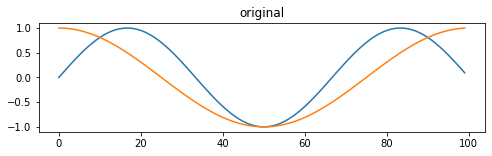

In [4]:
draw_plot(X, title="original")

## jitter

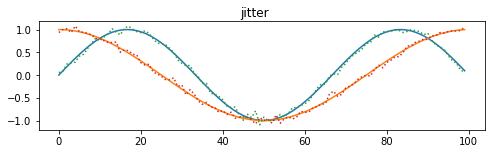

In [5]:
draw_plot(X, jitter(X) ,overwrite=True, title="jitter")

## scaling

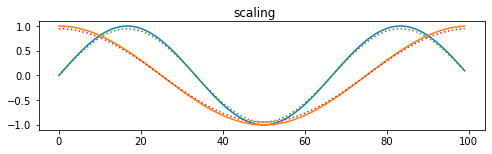

In [6]:
draw_plot(X, scaling(X), overwrite=True, title="scaling")

## magnitude warp

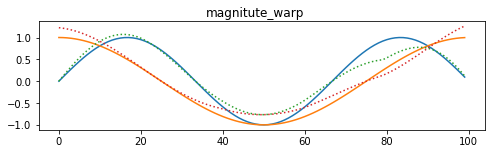

In [7]:
draw_plot(X, magnitude_warp(X), overwrite=True, title="magnitute_warp");

  (distort time steps)

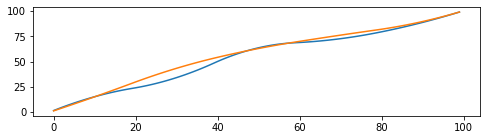

In [8]:
draw_plot(distort_time_steps(X, sigma=0.3));

## time warp

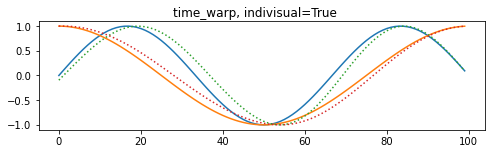

In [9]:
draw_plot(X, time_warp(X, individual=False), overwrite=True, title="time_warp, indivisual=True")

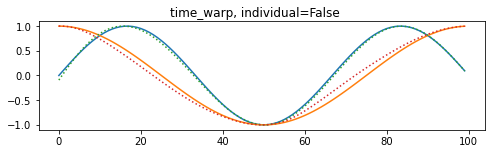

In [10]:
draw_plot(X, time_warp(X, individual=True), overwrite=True, title="time_warp, individual=False");

## stretch

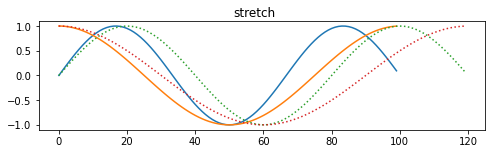

In [11]:
draw_plot(X, time_stretch(X, 1.2), overwrite=True, title="stretch")

## partial stretch

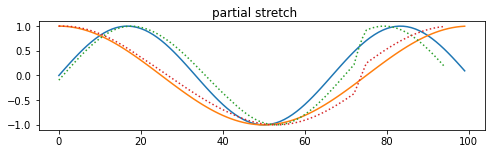

In [16]:
draw_plot(X, partial_time_stretch(X, ((0.2, 0.4, 1.1), (0.7, 0.8, 0.3))), overwrite=True, title="partial stretch")

## resampling

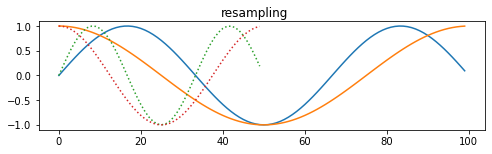

In [43]:
draw_plot(X, resampling(X, src_period=10, dst_period=20), overwrite=True, title="resampling")

# Augmentation with class

## jitter class

In [17]:
jitter_cls = TsJitter()

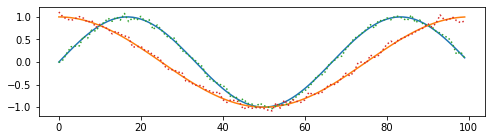

In [18]:
draw_plot(X, jitter_cls.fit_transform(X), overwrite=True)

In [19]:
jitter_cls.noise.shape

(100, 2)

In [20]:
scaling_cls = TsScalar(individual=True)

## scaling class

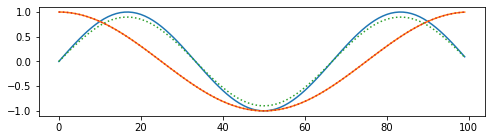

In [21]:
draw_plot(X, scaling_cls.fit_transform(X), overwrite=True)

In [22]:
scaling_cls.scaling_factor

array([[0.89775304, 0.99983632]])

## magnitude warp class

In [23]:
magnitude_warp_cls = TsMagnitudeWarp(individual=True)

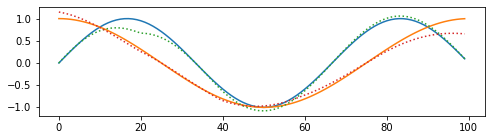

In [24]:
draw_plot(X, magnitude_warp_cls.fit_transform(X), overwrite=True)

In [25]:
magnitude_warp_cls.random_curve.shape

(100, 2)

## time warp class

In [26]:
time_warp_cls = TsTimeWarp()

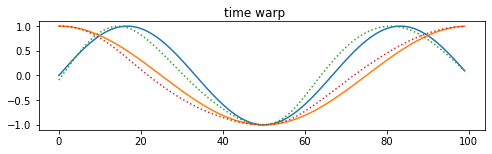

In [29]:
draw_plot(X, time_warp_cls.fit_transform(X), overwrite=True, title="time warp")

## stretch class

In [30]:
time_stretch_cls = TsTimeStretch(scale=2)

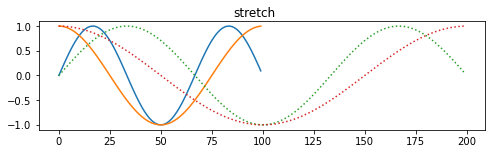

In [32]:
draw_plot(X, time_stretch_cls.fit_transform(X), overwrite=True, title="stretch")

## partial time stretch

In [39]:
stretches = ((0.2, 0.3, 1.5), (0.5, 0.6, 0.2))
partial_time_stretch_cls = TsPartialTimeStretch(stretches=stretches)

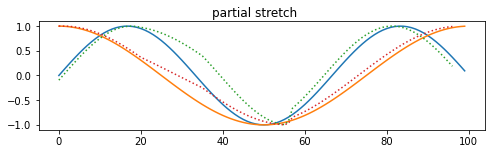

In [40]:
draw_plot(X, partial_time_stretch_cls.fit_transform(X), overwrite=True, title="partial stretch")

## resampling

In [49]:
resampling_cls = TsResampling(src_period = 2, dst_period = 4)

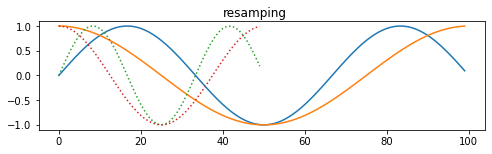

In [50]:
draw_plot(X, resampling_cls.fit_transform(X), overwrite=True, title="resamping")

# Last

In [51]:
import numpy.testing as npt

In [53]:
x = np.ones((10,4))

In [57]:
type(npt.assert_array_equal(x, np.zeros((10,4))))

AssertionError: 
Arrays are not equal

Mismatched elements: 40 / 40 (100%)
Max absolute difference: 1.
Max relative difference: inf
 x: array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],...
 y: array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],...

In [59]:
np.allclose(x, x, rtol=1e-05, atol=1e-08)

True

In [60]:
np.alloc(x,x)

AttributeError: module 'numpy' has no attribute 'alloc'